## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd 

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_bins = application_df['APPLICATION_TYPE'].value_counts()

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

#################### Changing bins to include values with over 100 occurrences instead of 500 ####################
application_types_to_replace = []
cutoff_val = 100
for index, val in application_type_bins.items():
    if val <= cutoff_val:
        application_types_to_replace.append(index)
        

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")


In [6]:
# Look at CLASSIFICATION value counts for binning
classification_bins = application_df['CLASSIFICATION'].value_counts()

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

#################### Changing bins to include values with over 700 occurrences instead of 1000 ####################
classifications_to_replace = []
cutoff_val = 700
for index, val in classification_bins.items():
    if val <= cutoff_val:
        classifications_to_replace.append(index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_appilcation_df = pd.get_dummies(application_df)

In [9]:
# Split our preprocessed data into our features and target arrays
y = dummies_appilcation_df.IS_SUCCESSFUL.values
X = dummies_appilcation_df.drop(columns = 'IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimization #1

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

######################## Remove some units per layer, add a hidden layer, and change activation to tanh #####################################

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="tanh", input_dim=45))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 368       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5858 - accuracy: 0.7085
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5626 - accuracy: 0.7264
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7284
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7301
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7306
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7302
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7298
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7302
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5508 - accuracy: 0.7312: 
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.73

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5525 - accuracy: 0.7262
Loss: 0.5524606704711914, Accuracy: 0.7261807322502136


In [15]:
### Slightly better than our attempt before optimization

## Optimization #2

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

######################## Add some units per layer, add a hidden layer, and change activation to relu #####################################

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=24, activation="relu", input_dim=45))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                1104      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5791 - accuracy: 0.7113
Epoch 2/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7278
Epoch 3/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.7290
Epoch 4/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7314
Epoch 5/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7302
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7307
Epoch 7/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7306
Epoch 8/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7321
Epoch 9/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7331
Epoch 10/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accura

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.7278
Loss: 0.5590168833732605, Accuracy: 0.7278134226799011


In [20]:
## A little better, but not by much

## Optimization #3

In [146]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

######################## Add some units per layer, add a hidden layer, and change activation to relu #####################################

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="sigmoid", input_dim=45))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=28, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=28, activation="sigmoid"))

# Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=28, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 40)                1840      
_________________________________________________________________
dense_108 (Dense)            (None, 28)                1148      
_________________________________________________________________
dense_109 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 29        
Total params: 3,829
Trainable params: 3,829
Non-trainable params: 0
_________________________________________________________________


In [147]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.008)

In [148]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer = optimizer, metrics=["accuracy"])

In [149]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=250)

Epoch 1/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5835 - accuracy: 0.7155
Epoch 2/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5633 - accuracy: 0.7268
Epoch 3/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7283
Epoch 4/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.7295
Epoch 5/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7295
Epoch 6/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7294
Epoch 7/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7302
Epoch 8/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7300
Epoch 9/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7312
Epoch 10/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accura

In [150]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 1s 1ms/step - loss: 0.5788 - accuracy: 0.7313
Loss: 0.5787718892097473, Accuracy: 0.7313119769096375


In [151]:
## Not sure where this accuracy test is getting its accuracy from but the epochs managed a steady 74.15% accuracy which is a little better

<AxesSubplot:>

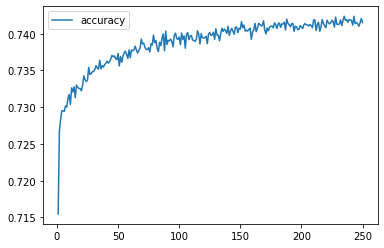

In [152]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="accuracy")

In [153]:
nn.save('Models/alphabetSoupCharity_Optimization.h5')